In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('E:/ETG\\summer.csv')

In [38]:
data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [10]:
## how many cities there ?
len(data['City'].unique())

22

In [19]:
## which game having most number of gold madels
gold_medals=data[data['Medal']=='Gold']
gold_games=[]
for sport in gold_medals['Sport'].unique():
    gold_games.append(sport)
    
len(gold_games)

43

In [63]:
## Which sport have most number of medals
medals=data.groupby(['Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)
Top_medal=medals.head()

<AxesSubplot:xlabel='Sport'>

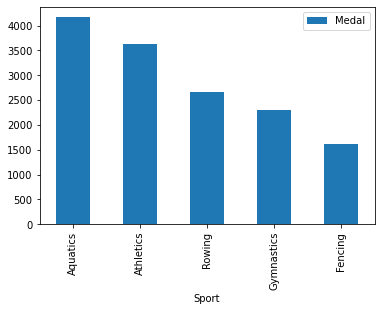

In [64]:
Top_medal.plot(x='Sport', y='Medal', kind='bar')

In [60]:
## player has won most number of medals
Top_athlete=data.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
Top_athlete.head()

,Athlete,Medal,Sport
18383,"PHELPS, Michael",Gold,18
13465,"LEWIS, Carl",Gold,9
17060,"NURMI, Paavo",Gold,9
22145,"SPITZ, Mark",Gold,9
13061,"LATYNINA, Larisa",Gold,9


In [66]:
## Player has won most number of gold medals
Top_gold_athletre=gold_medals.groupby(['Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)
Top_gold_athletre.head()

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


In [103]:
## which year india has won first gold medal
india_medal=data[data['Country']=='IND'].sort_values(by='Year', ascending=True)
india_gold_medal=india_medal[india_medal['Medal']=='Gold']
india_gold_medal
        

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5526,1928,Amsterdam,Hockey,Hockey,"YUSUF, Sayed Mohamed",IND,Men,Hockey,Gold
5525,1928,Amsterdam,Hockey,Hockey,"SINGH, Jaipal",IND,Men,Hockey,Gold
5524,1928,Amsterdam,Hockey,Hockey,"SHAUKAT, Ali",IND,Men,Hockey,Gold
5523,1928,Amsterdam,Hockey,Hockey,"SEAMAN, Frederic S.",IND,Men,Hockey,Gold
5522,1928,Amsterdam,Hockey,Hockey,"ROCQUE, Michael E.",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
16091,1980,Moscow,Hockey,Hockey,"DEAVINDER, Singh",IND,Men,Hockey,Gold
16090,1980,Moscow,Hockey,Hockey,"CHETTRI, Chettri",IND,Men,Hockey,Gold
16089,1980,Moscow,Hockey,Hockey,"BASKARAN, Baskaran",IND,Men,Hockey,Gold
16095,1980,Moscow,Hockey,Hockey,"KUMAR, Charanjit",IND,Men,Hockey,Gold


In [156]:
## which sport havce most female gold-medalist
female_gold=data[data['Gender']=='Women'].sort_values(by='Year', ascending=True)
female_gold=female_gold[female_gold['Medal']=='Gold']
female_gold




,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
731,1904,St Louis,Archery,Archery,"POLLOCK, Jessie",USA,Women,Teams Fita Round,Gold
733,1904,St Louis,Archery,Archery,"WOODRUFF, Laura",USA,Women,Teams Fita Round,Gold
...,...,...,...,...,...,...,...,...,...
29835,2012,London,Basketball,Basketball,"CATCHINGS, Tamika",USA,Women,Basketball,Gold
29836,2012,London,Basketball,Basketball,"CHARLES, Tina",USA,Women,Basketball,Gold
29837,2012,London,Basketball,Basketball,"FOWLES, Sylvia",USA,Women,Basketball,Gold
29838,2012,London,Basketball,Basketball,"JONES, Asjha",USA,Women,Basketball,Gold


<AxesSubplot:xlabel='sport'>

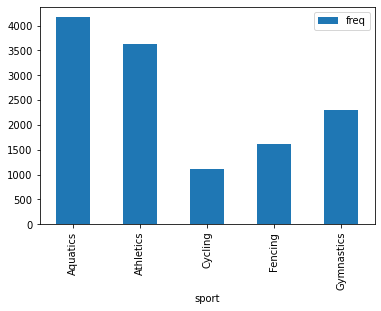

In [154]:
## which event is most popular in terms of number of players 
pop_event =[]
for sport in data['Sport'].unique():
    pop_event.append([sport, len(data[data['Sport']==sport])])

pop_event=pd.DataFrame(pop_event, columns=['sport', 'freq'])
pop_event=pop_event.head(5)
pop_event.plot(x='sport', y='freq', kind='bar')